# **1. Perkenalan Dataset**


Dataset `diamonds_price.arff` adalah dataset klasik yang berisi harga dan berbagai informasi dari hampir **54.000** berlian (_diamonds_).

Dataset ini didapat dari [OpenML diamonds](https://www.openml.org/search?type=data&sort=runs&id=42225&status=active), dengan lisensi public domain.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
from scipy.io import arff
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn import preprocessing as prep
from sklearn.model_selection import train_test_split

# **3. Memuat Dataset**

Karena dataset memiliki format `.arff`, maka kita menggunakan library tambahan untuk memuatnya, yaitu `arff.loadarff` dari Scipy. Kemudian kita akan memuatnya menjadi DataFrame dengan pandas.

In [2]:
DATASET_PATH = '../dataset/raw/diamonds-price.arff'

In [3]:
data, meta = arff.loadarff(DATASET_PATH)
data

array([(0.23, b'Ideal', b'E', b'SI2', 61.5, 55.,  326., 3.95, 3.98, 2.43),
       (0.21, b'Premium', b'E', b'SI1', 59.8, 61.,  326., 3.89, 3.84, 2.31),
       (0.23, b'Good', b'E', b'VS1', 56.9, 65.,  327., 4.05, 4.07, 2.31),
       ...,
       (0.7 , b'Very Good', b'D', b'SI1', 62.8, 60., 2757., 5.66, 5.68, 3.56),
       (0.86, b'Premium', b'H', b'SI2', 61. , 58., 2757., 6.15, 6.12, 3.74),
       (0.75, b'Ideal', b'D', b'SI2', 62.2, 55., 2757., 5.83, 5.87, 3.64)],
      dtype=[('carat', '<f8'), ('cut', 'S9'), ('color', 'S1'), ('clarity', 'S4'), ('depth', '<f8'), ('table', '<f8'), ('price', '<f8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

In [4]:
df = pd.DataFrame(data)
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,b'Ideal',b'E',b'SI2',61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,b'Premium',b'E',b'SI1',59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,b'Good',b'E',b'VS1',56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,b'Premium',b'I',b'VS2',62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,b'Good',b'J',b'SI2',63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,b'Ideal',b'D',b'SI1',60.8,57.0,2757.0,5.75,5.76,3.50
53936,0.72,b'Good',b'D',b'SI1',63.1,55.0,2757.0,5.69,5.75,3.61
53937,0.70,b'Very Good',b'D',b'SI1',62.8,60.0,2757.0,5.66,5.68,3.56
53938,0.86,b'Premium',b'H',b'SI2',61.0,58.0,2757.0,6.15,6.12,3.74


**Details**:
- `price`: Harga dalam dolar Amerika (\\$326 - \\$18.823).
- `carat`: Berat berlian (0.2 - 5.01).
- `cut`: Kualitas potongan (Fair, Good, Very Good, Premium, Ideal)
- `color`: Warna berlian (dari J ke D).
- `clarity`: Pengukuran untuk kemurnian berlian (I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF).
- `x`: Panjang dalam satuan milimeter (0 - 10.74).
- `y`: Lebar dalam satuan milimeter (0 - 58.9).
- `z`: Kedalaman dalam satuan milimeter (0 - 31.8).
- `depth`: Rasio kedalaman berlian, dengan rumus `z / ((x + y) / 2)` atau `2 * z / (x + y)` (43 - 79).
- `table`: Rasio lebar atas berlian relatif dengan poin terlebar (43 - 95).

Perlu diperhatikan bahwa urutannya mulai dari yang paling kiri (jelek) ke kanan (bagus).

Kolom kategori masih dalam tipe data `bytes` dan harus diubah dulu menjadi `string`.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  float64
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(7), object(3)
memory usage: 4.1+ MB


In [6]:
category_cols = df.select_dtypes('object').columns
category_cols

Index(['cut', 'color', 'clarity'], dtype='object')

In [7]:
df[category_cols] = df[category_cols].apply(lambda series: series.str.decode('utf-8'))
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757.0,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757.0,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757.0,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757.0,6.15,6.12,3.74


Semua kolom kategori telah diubah menjadi tipe data `string`. Hal tersebut penting karena kita akan menggunakannya di bagian EDA.

# **4. Exploratory Data Analysis (EDA)**

Exploratory Data Analysis (EDA) adalah analisis data untuk mengetahui informasi data dengan baik.

Pertama, kita analisa kasar dulu datanya.

In [8]:
df.shape

(53940, 10)

In [9]:
df.duplicated().sum()

np.int64(146)

In [10]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

**Insight**:
1. Dataset memiliki **53940 baris** dan **10 kolom**.
2. **146** baris **duplikat**.
3. **Tidak ada** data yang hilang.

In [11]:
df = df.drop_duplicates()
df.shape

(53794, 10)

Karena data telah bersih, kita lanjutkan dengan melihat isi data dari kolom yang bertipe data string.

In [12]:
def unique(index):
    print(f'Column: {category_cols[index]}')
    print(df[category_cols[index]].unique())

In [13]:
unique(0)

Column: cut
['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']


In [14]:
unique(1)

Column: color
['E' 'I' 'J' 'H' 'F' 'G' 'D']


In [15]:
unique(2)

Column: clarity
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


Di file dataset tersebut, dijelaskan tentang urutannya. Kita akan melakukan encoding dengan itu.

In [16]:
CUT_COL_VALUE_ORDER     = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
COLOR_COL_VALUE_ORDER   = np.sort(df['color'].unique())[::-1] # J (jelek) ke D (bagus)
CLARITY_COL_VALUE_ORDER = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

In [17]:
ordinal_encoder = prep.OrdinalEncoder(categories=[CUT_COL_VALUE_ORDER, COLOR_COL_VALUE_ORDER, CLARITY_COL_VALUE_ORDER], dtype='int32')

In [18]:
df_encoded = df.copy()
df_encoded[category_cols] = ordinal_encoder.fit_transform(df[category_cols])
df_encoded

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,5,1,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,3,5,2,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,1,5,4,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,3,1,3,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,1,0,1,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,4,6,2,60.8,57.0,2757.0,5.75,5.76,3.50
53936,0.72,1,6,2,63.1,55.0,2757.0,5.69,5.75,3.61
53937,0.70,2,6,2,62.8,60.0,2757.0,5.66,5.68,3.56
53938,0.86,3,2,1,61.0,58.0,2757.0,6.15,6.12,3.74


Kemudian kita lihat bagaimana keadaan dari isi dataset tersebut.

In [19]:
df_encoded.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53794.00000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000
mean,0.79778,2.904134,3.406086,3.051920,61.748080,57.458109,3933.065082,5.731214,5.734653,3.538714
std,0.47339,1.116098,1.701117,1.646857,1.429909,2.233679,3988.114460,1.120695,1.141209,0.705037
min,0.20000,0.000000,0.000000,0.000000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.40000,2.000000,2.000000,2.000000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.70000,3.000000,3.000000,3.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.04000,4.000000,5.000000,4.000000,62.500000,59.000000,5326.750000,6.540000,6.540000,4.030000
max,5.01000,4.000000,6.000000,7.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


**Insight** dari deskripsi dataset:
1. Kolom `x`, `y`, dan `z` memiliki **nilai 0**. Seharusnya itu tidak mungkin terjadi.
2. Kolom `price` memiliki distribusi yang **cukup jauh**.

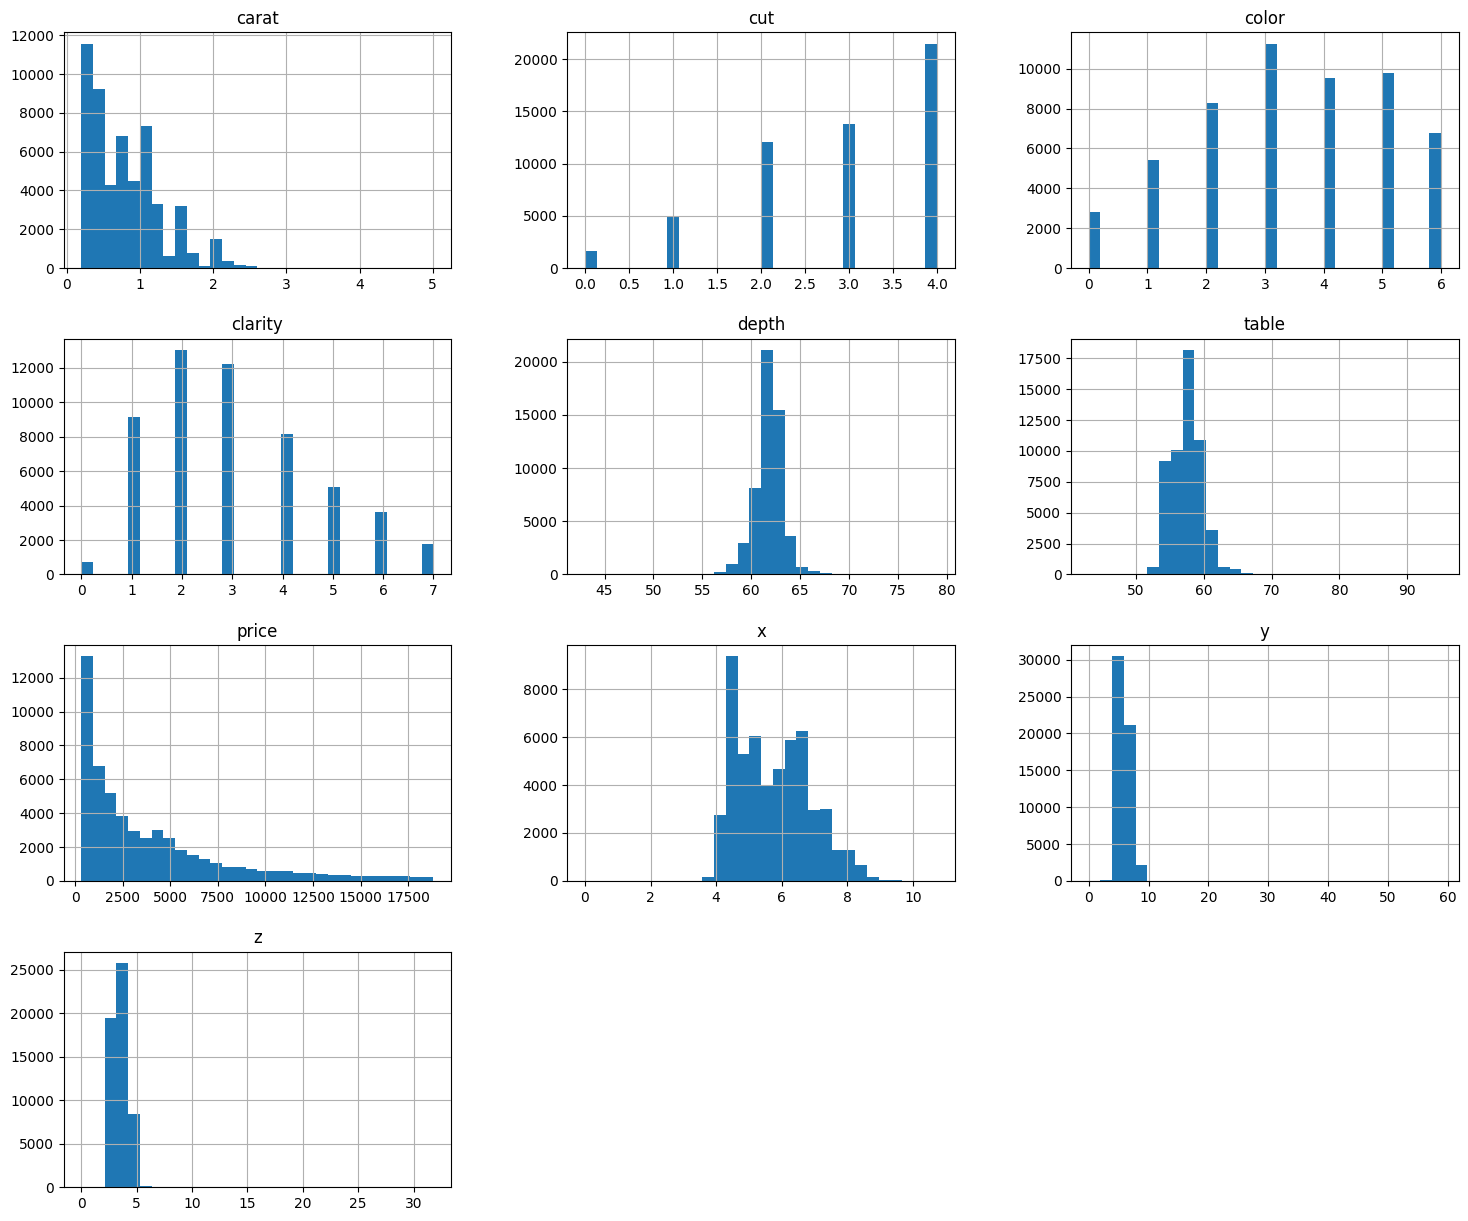

In [20]:
df_encoded.hist(bins=30, figsize=[18, 15])
plt.show()

**Insight** dari histogram:
1. **Distribusi nilai minimum ke nilai maksimum** dari beberapa kolom **tidak merata dengan baik**, antara lain kolom `carat`, `depth`, `table`, `price`, `x`, `y`, dan `z`.
2. Distribusi tidak merata di beberapa kolom kemungkinan **disebabkan oleh outlier**.

In [21]:
correlation = df_encoded.corr()

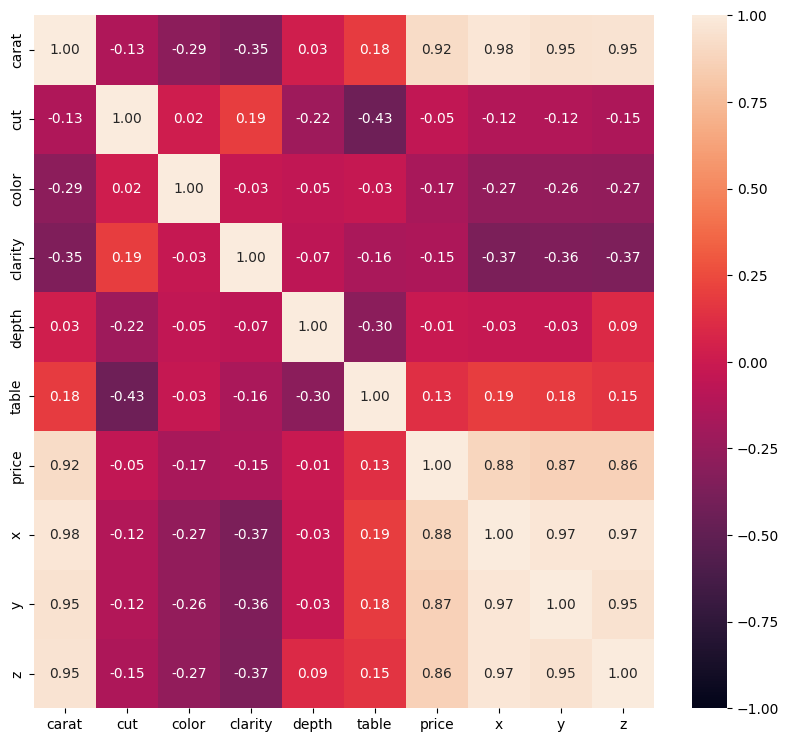

In [22]:
plt.figure(figsize=[10, 9])
sns.heatmap(correlation, fmt='.2f', annot=True, vmin=-1, vmax=1)
plt.show()

**Insight** dari korelasi:
1. Kolom `carat`, `x`, `y`, dan `z` **sangat berkorelasi** satu sama lain, dan yang terpenting kolom tersebut **sama-sama berkorelasi tinggi** dengan kolom `price` (target). Mungkin kita hanya akan menggunakan salah satu kolom saja.
2. Kolom `cut`, `color`, `clarity`, `depth`, dan `table` **tidak berkorelasi** dengan kolom `price`. Mungkin kita akan menghapus kolom yang memang tidak ada hubungannya dengan kolom `price`.

Kita akan melihat outlier yang ada di setiap kolom.

In [23]:
def get_row_lenght(cols, col_lenght):
    return int(np.ceil(len(cols) / col_lenght))

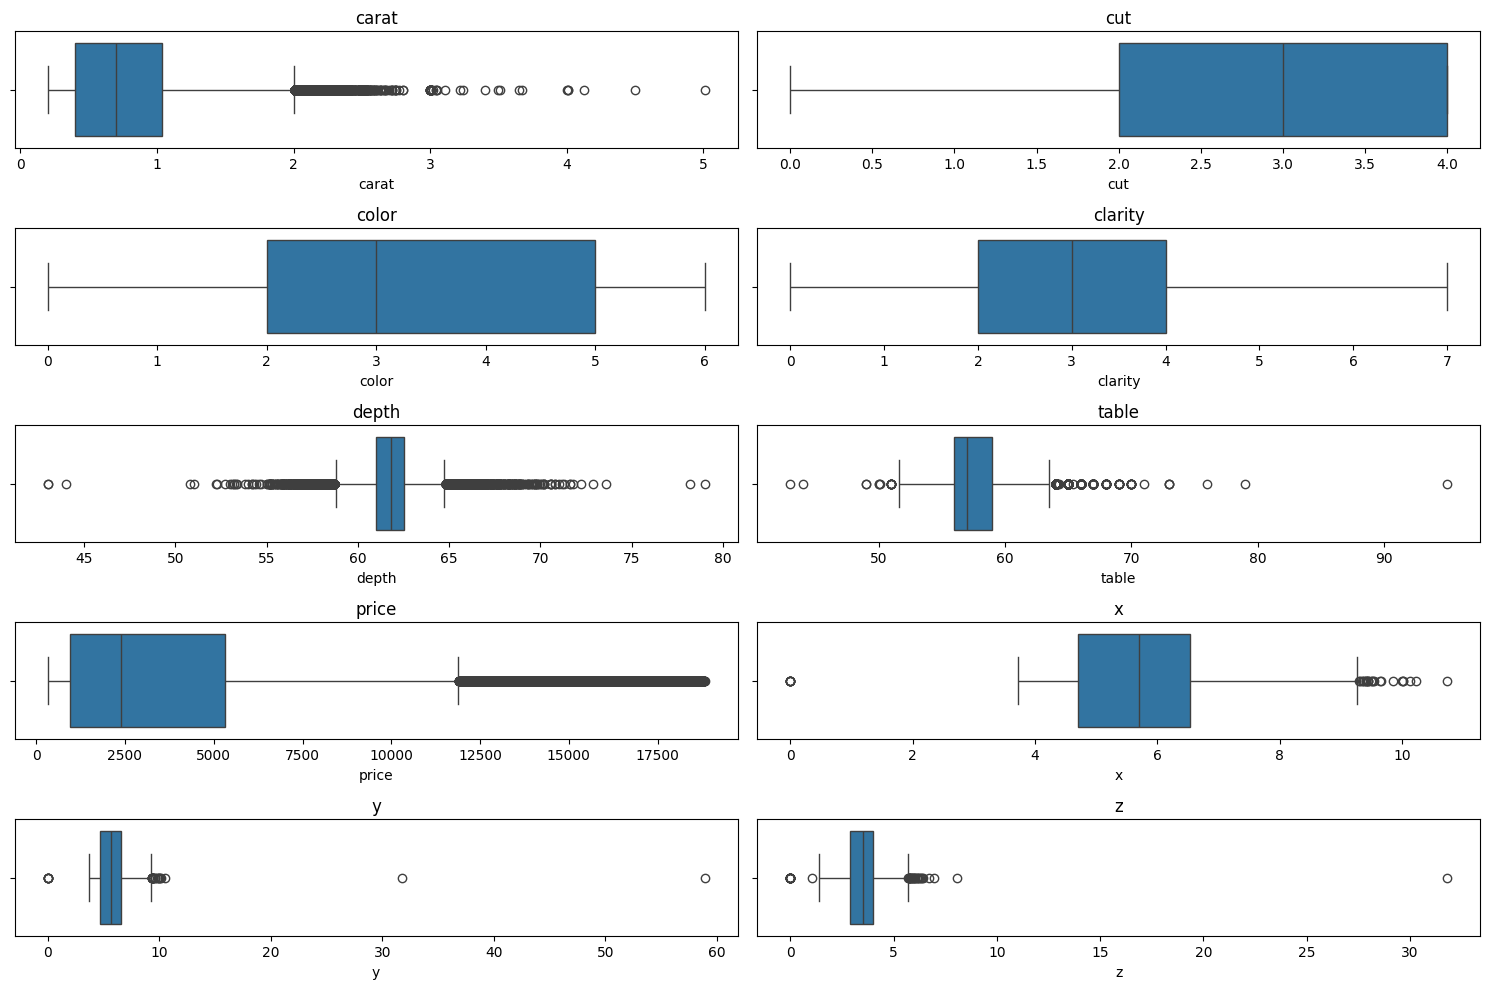

In [24]:
cols = df.columns

plt.figure(figsize=[15, 10])
col_lenght = 2
row_lenght = get_row_lenght(cols, col_lenght)

for index, col in enumerate(cols):
    ax = plt.subplot(row_lenght, col_lenght, index + 1)
    sns.boxplot(df_encoded[col], orient='y', ax=ax)
    ax.set_title(col)

plt.tight_layout()
plt.show()

**Insight** dari boxplot:
1. **Hampir seluruh** kolom memiliki outlier.
2. Kolom `cut`, `color`, `clarity` **tidak memiliki** outlier.

Kita akan melihat grafik hubungan kolom yang berkorelasi tinggi dengan kolom `price`.

In [25]:
price_corr = correlation['price']

def columns_with_corr(callback):
    cols = price_corr[price_corr.map(callback)].index
    return [col for col in cols if col != 'price']

In [26]:
high_corr_cols = columns_with_corr(lambda x: x >= 0.85)
high_corr_cols

['carat', 'x', 'y', 'z']

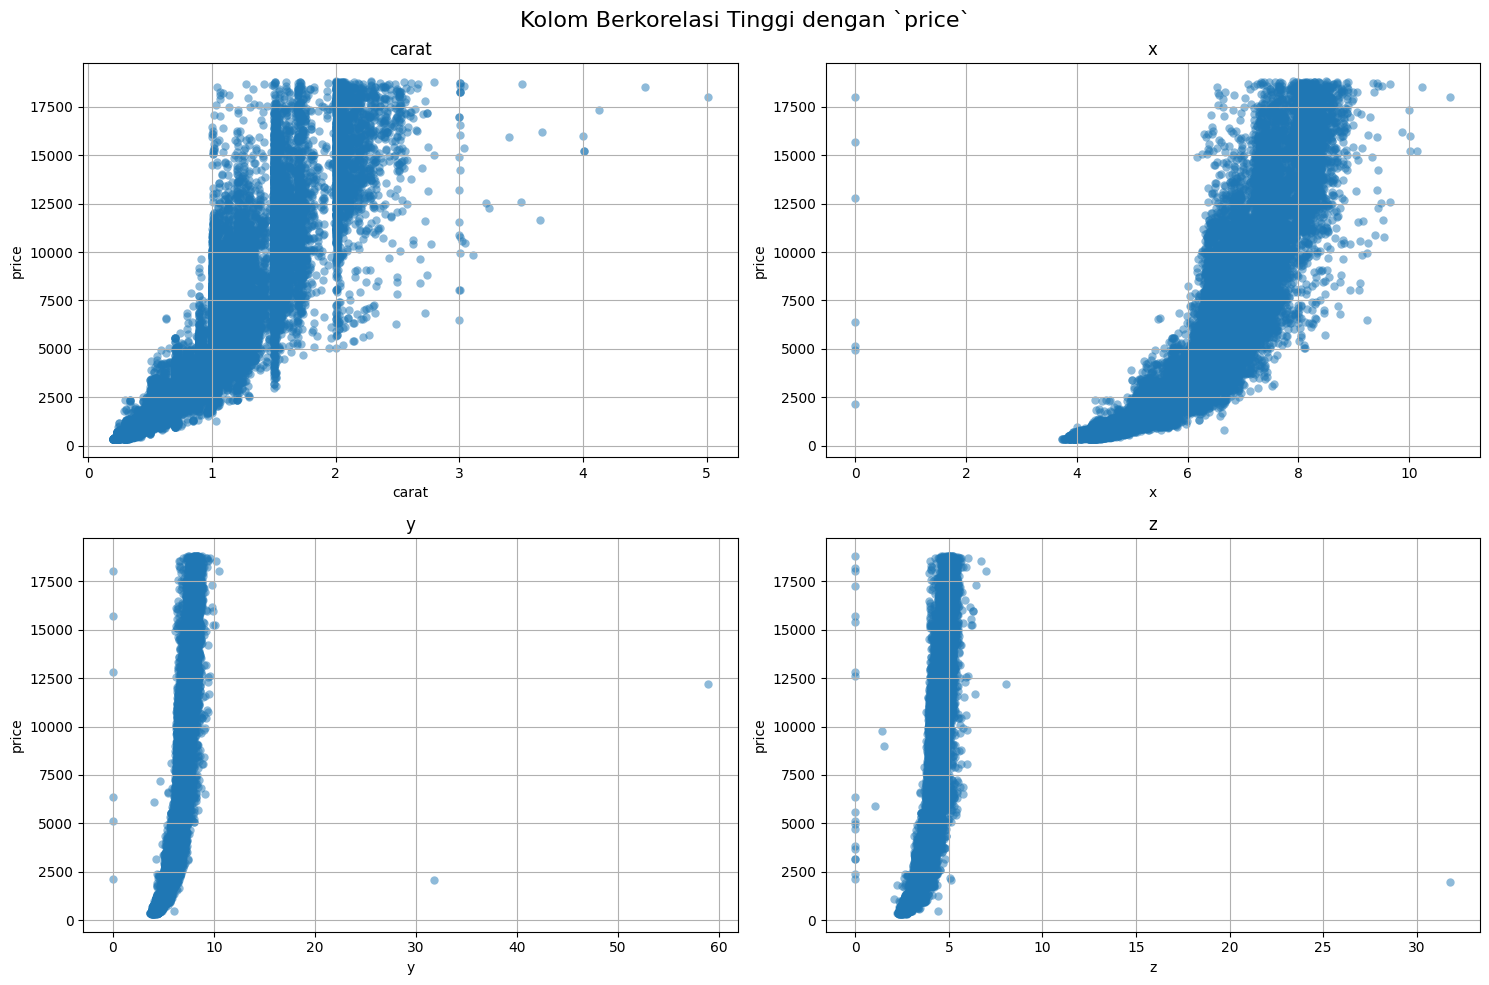

In [27]:
plt.figure(figsize=[15, 10])
col_lenght = 2
row_lenght = get_row_lenght(high_corr_cols, col_lenght)

for index, col in enumerate(high_corr_cols):
    ax = plt.subplot(row_lenght, col_lenght, index + 1)
    sns.scatterplot(df_encoded, x=col, y='price', linewidth=0, alpha=0.5)
    ax.set_title(col)
    ax.grid()

plt.suptitle('Kolom Berkorelasi Tinggi dengan `price`', size=16)
plt.tight_layout()
plt.show()

**Insight** dari plot korelasi tinggi:
1. Kolom `x`, `y`, dan `z` memiliki beberapa **nilai invalid** yaitu 0.
2. Kolom `x`, `y`, dan `z` juga memiliki beberapa **outlier**.
3. **Pertambahan nilai** walaupun berjumlah kecil **sangat berdampak** pada nilai kolom `price`.

Kita juga akan melihat grafik hubungan kolom yang berkorelasi rendah dengan kolom `price`.

In [28]:
low_corr_cols = columns_with_corr(lambda x: x < 0.2)
low_corr_cols

['cut', 'color', 'clarity', 'depth', 'table']

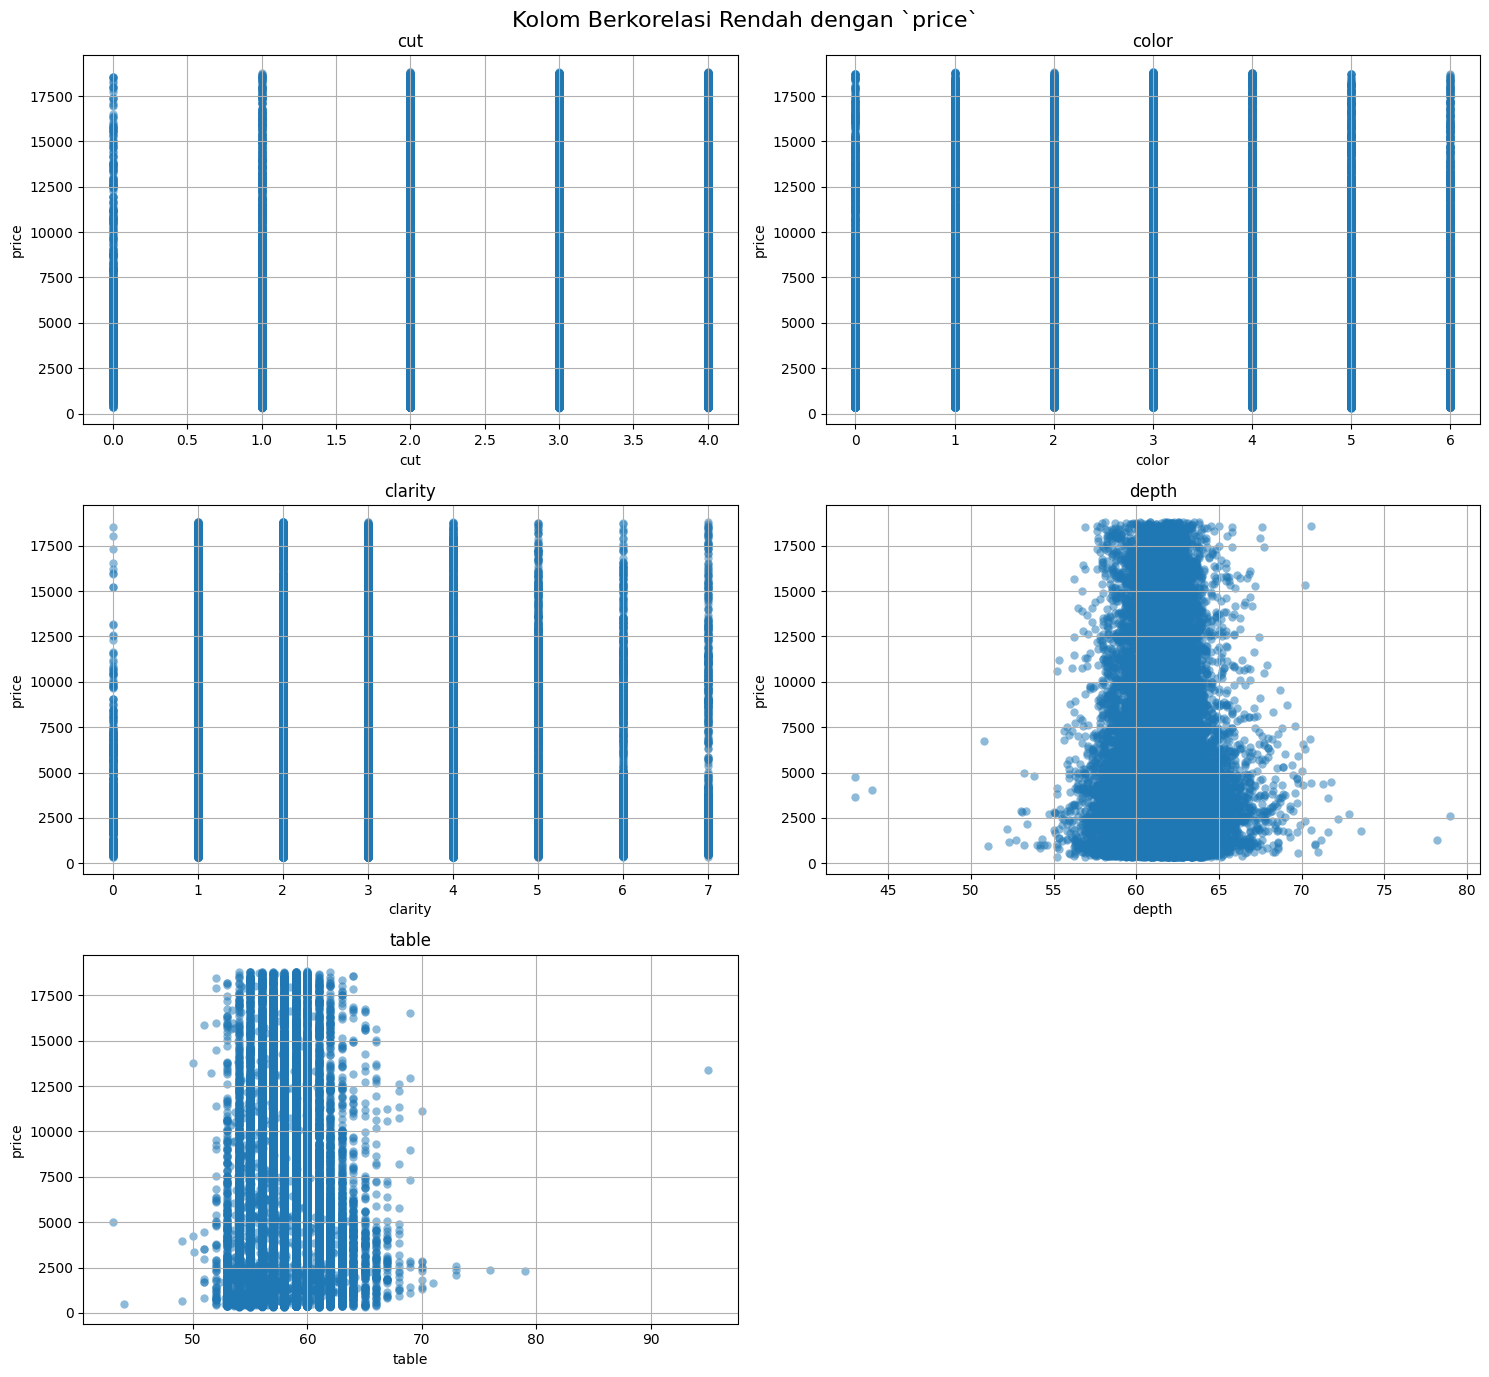

In [29]:
plt.figure(figsize=[15, 14])

col_lenght = 2
row_lenght = get_row_lenght(low_corr_cols, col_lenght)

for index, col in enumerate(low_corr_cols):
    ax = plt.subplot(row_lenght, col_lenght, index + 1)
    sns.scatterplot(df_encoded, x=col, y='price', linewidth=0, alpha=0.5)
    ax.set_title(col)
    ax.grid()

plt.suptitle('Kolom Berkorelasi Rendah dengan `price`', size=16)
plt.tight_layout()
plt.show()

**Insight** dari plot korelasi rendah:
1. Memang benar bahwa kolom `cut`, `color`, `clarity`, `depth`, dan `table` tidak membentuk pola linear dengan kolom `price`.
2. Kolom `depth` dan `table` memiliki beberapa **outlier**.

Dan terakhir mari kita lihat barplot dari kolom kategori.

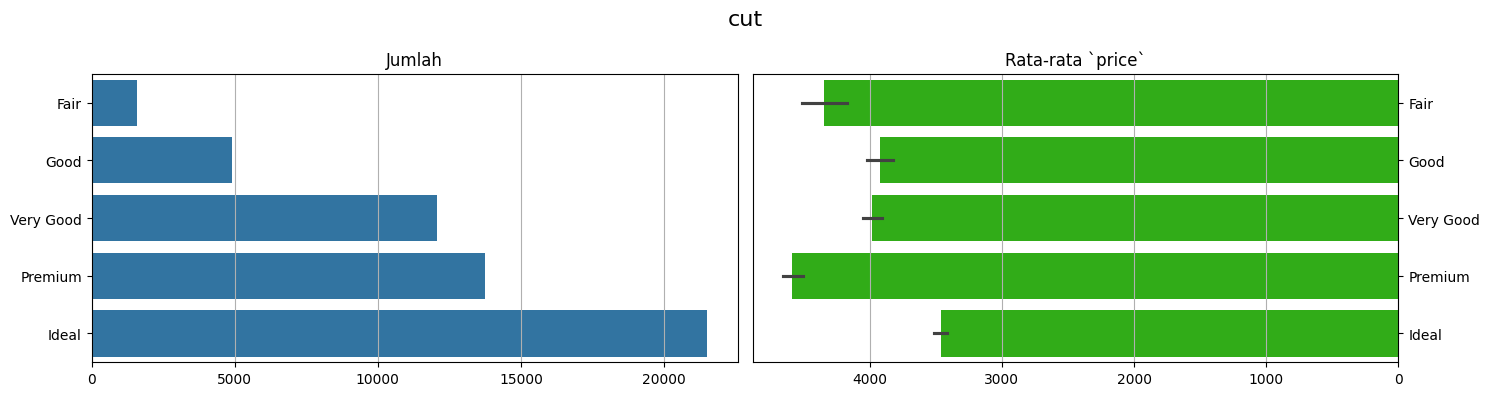

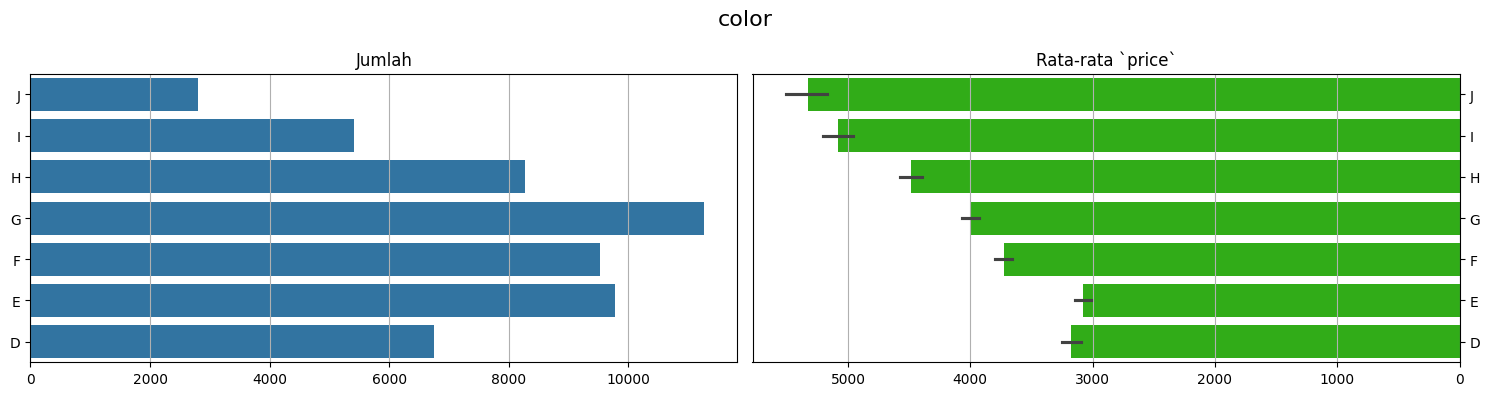

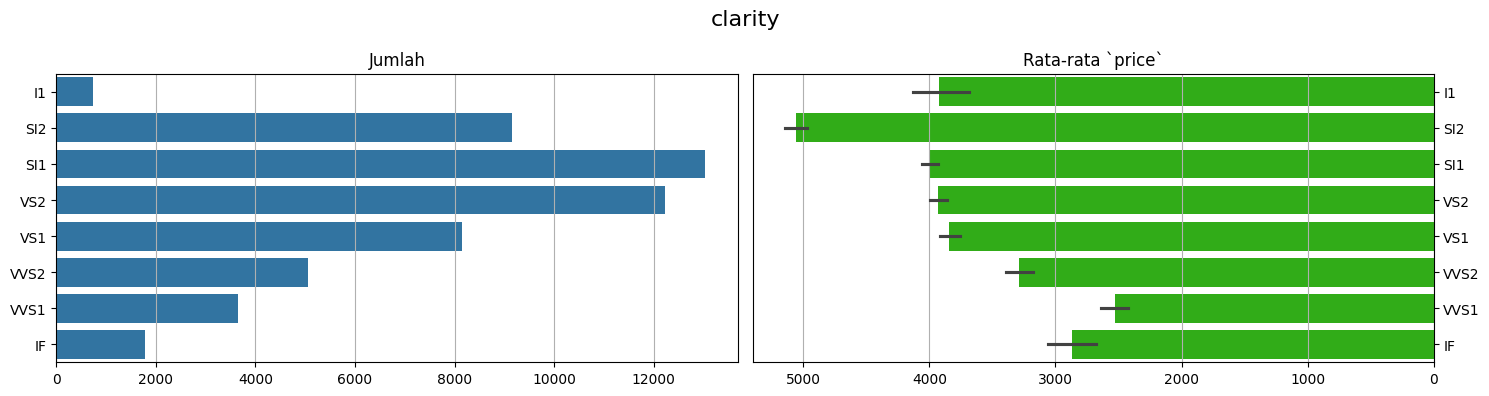

In [30]:
for index, col in enumerate(category_cols):
    _, ax = plt.subplots(1, 2, figsize=[15, 4])
    categories = ordinal_encoder.categories_[index]

    sns.countplot(df_encoded, y=col, ax=ax[0])
    ax[0].set_title('Jumlah')
    ax[0].set_xlabel(None)
    ax[0].set_ylabel(None)
    ax[0].set_yticks(ticks=range(len(categories)), labels=categories)
    ax[0].grid(axis='x')

    sns.barplot(df_encoded, x='price', y=col, ax=ax[1], orient='y', color='#21c400')
    ax[1].set_title('Rata-rata `price`')
    ax[1].set_xlabel(None)
    ax[1].set_ylabel(None)
    ax[1].invert_xaxis()
    ax[1].yaxis.tick_right()
    ax[1].set_yticks(ticks=range(len(categories)), labels=categories)
    ax[1].grid(axis='x')

    plt.suptitle(col, size=16)
    plt.tight_layout()
    plt.show()

**Insight** dari barplot:
1. Setiap kategori memiliki **perbedaan jumlah yang signifikan** dengan kategori lain.
2. Terlihat bahwa kolom-kolom tersebut menghasilkan **urutan rata-rata** `price` tidak benar, atau bahkan secara **terbalik**.

**PENTING**

Kolom-kolom dengan korelasi rendah belum tentu tidak memiliki peran dalam kolom `price`, itu hanya mengatakan bahwa kolom tersebut tidak memiliki pola linear dengan kolom `price`. Jadi kita akan tetap menggunakan kolom utama.

# **5. Data Preprocessing**

Kita akan melakukan proses _preprocessing_ pada dataset ini untuk mendapatkan dataset yang bersih dan baik untuk model machine learning.

## a. Menghapus Kolom Berkorelasi Tinggi

Kolom `carat`, `x`, `y`, dan `z` adalah kolom berkorelasi tinggi satu sama lain, dan juga berkorelasi tinggi pada kolom `price`. Jadi kita akan memilih salah satu dari kolom tersebut.

In [31]:
# Mengambil kolom dengan korelasi tertinggi
highest_corr    = correlation['price'][high_corr_cols].max()
eliminated_cols = [col for col in high_corr_cols if correlation['price'][col] < highest_corr]

df_prep1 = df.drop(eliminated_cols, axis=1)
df_prep1

,carat,cut,color,clarity,depth,table,price
0,0.23,Ideal,E,SI2,61.5,55.0,326.0
1,0.21,Premium,E,SI1,59.8,61.0,326.0
2,0.23,Good,E,VS1,56.9,65.0,327.0
3,0.29,Premium,I,VS2,62.4,58.0,334.0
4,0.31,Good,J,SI2,63.3,58.0,335.0
...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757.0
53936,0.72,Good,D,SI1,63.1,55.0,2757.0
53937,0.70,Very Good,D,SI1,62.8,60.0,2757.0
53938,0.86,Premium,H,SI2,61.0,58.0,2757.0


## b. Encoding Kolom Kategori

Kolom kategori diubah menjadi angka dengan urutan yang telah diatur di dataset.

In [32]:
df_prep2 = df_prep1.copy()
df_prep2[category_cols] = ordinal_encoder.transform(df_prep2[category_cols])
df_prep2

,carat,cut,color,clarity,depth,table,price
0,0.23,4,5,1,61.5,55.0,326.0
1,0.21,3,5,2,59.8,61.0,326.0
2,0.23,1,5,4,56.9,65.0,327.0
3,0.29,3,1,3,62.4,58.0,334.0
4,0.31,1,0,1,63.3,58.0,335.0
...,...,...,...,...,...,...,...
53935,0.72,4,6,2,60.8,57.0,2757.0
53936,0.72,1,6,2,63.1,55.0,2757.0
53937,0.70,2,6,2,62.8,60.0,2757.0
53938,0.86,3,2,1,61.0,58.0,2757.0


## c. Menghapus Outlier

Ada beberapa nilai kolom yang tidak wajar dan kita seharusnya menghapusnya.

In [33]:
df_prep3 = df_prep2.copy()
outlier_treshold = 1.6

for col in df_prep3.columns.drop(['price', *category_cols]):
    col_val = df_prep3[col]

    Q1  = col_val.quantile(0.25)
    Q3  = col_val.quantile(0.75)
    IQR = Q3 - Q1

    IQR_treshold = IQR * outlier_treshold
    df_prep3     = df_prep3[(df_prep3[col] >= Q1 - IQR_treshold) & (df_prep3[col] <= Q3 + IQR_treshold)]

df_prep3

,carat,cut,color,clarity,depth,table,price
0,0.23,4,5,1,61.5,55.0,326.0
1,0.21,3,5,2,59.8,61.0,326.0
3,0.29,3,1,3,62.4,58.0,334.0
4,0.31,1,0,1,63.3,58.0,335.0
5,0.24,2,0,5,62.8,57.0,336.0
...,...,...,...,...,...,...,...
53935,0.72,4,6,2,60.8,57.0,2757.0
53936,0.72,1,6,2,63.1,55.0,2757.0
53937,0.70,2,6,2,62.8,60.0,2757.0
53938,0.86,3,2,1,61.0,58.0,2757.0


## d. Menerapkan Logaritma pada Kolom Target

Karena kolom `price` memiliki peningkatan yang sangat tinggi atau logaritmik, maka kita akan menerapkan fungsi logaritma.

In [34]:
df_prep4 = df_prep3.copy()
df_prep4['price'] = np.log(df_prep4['price'])
df_prep4

,carat,cut,color,clarity,depth,table,price
0,0.23,4,5,1,61.5,55.0,5.786897
1,0.21,3,5,2,59.8,61.0,5.786897
3,0.29,3,1,3,62.4,58.0,5.811141
4,0.31,1,0,1,63.3,58.0,5.814131
5,0.24,2,0,5,62.8,57.0,5.817111
...,...,...,...,...,...,...,...
53935,0.72,4,6,2,60.8,57.0,7.921898
53936,0.72,1,6,2,63.1,55.0,7.921898
53937,0.70,2,6,2,62.8,60.0,7.921898
53938,0.86,3,2,1,61.0,58.0,7.921898


## e. Men-Skalakan Semua Kolom

Dan terakhir kita akan skalakan semua nilai untuk memudahkan model, tapi kita perlu membagi data dahulu dengan `random_state` yang sudah ditentukan untuk menghindari kebocoran _test set_.

In [35]:
X = df_prep4.drop('price', axis=1)
y = df_prep4[['price']]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=33)

scaler_x, scaler_y = prep.StandardScaler(), prep.StandardScaler()
X_train = scaler_x.fit_transform(X_train)
X_test  = scaler_x.transform(X_test)
y_train = scaler_y.fit_transform(y_train)
y_test  = scaler_y.transform(y_test)

X = [*X_train, *X_test]
y = [*y_train, *y_test]

df_prep5 = pd.DataFrame(np.concatenate([X, y], axis=1), columns=df_prep4.columns)
df_prep5

,carat,cut,color,clarity,depth,table,price
0,0.644713,0.971749,0.920694,-1.285331,-0.328586,-0.640509,0.756242
1,1.039356,-0.003506,-2.044046,1.147350,-0.855373,1.327428,0.904606
2,0.133998,0.971749,0.920694,-0.677161,0.110404,-0.640509,0.546298
3,1.991143,-1.954018,-0.858150,-0.068990,-0.240788,1.721015,1.689120
4,-0.539217,-0.003506,-2.044046,-0.068990,-0.767575,0.835444,-0.716951
...,...,...,...,...,...,...,...
50408,-0.817788,0.971749,0.327746,1.755520,0.461595,-1.132493,-0.527434
50409,0.575070,-1.954018,-0.265202,-0.677161,1.339574,0.835444,0.733279
50410,0.551856,-1.954018,0.920694,-1.285331,0.285999,1.819412,0.628821
50411,-1.189217,-0.003506,0.920694,0.539180,-0.943171,0.835444,-1.415795


## f. Menyimpan Data yang Sudah Diolah

In [36]:
df_prep5.to_csv('../dataset/preprocessed/diamond-price_notebook.csv', index=False)